## Exploratory Data Analysis - Terrorism

#### NAME : HARIHARAN M 

#### Importing Packages

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna

import plotly_express as px
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

#### Reading the data

In [103]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.head(4)

C:\Users\Vignesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### describing and cleaning the data

In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [105]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [106]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [107]:
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [108]:
data.shape

(181691, 135)

#### Listing null value columns

In [109]:
df=data.copy()

In [110]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [116]:
#creating data frame and listing the null values
df1=pd.DataFrame(columns=['columns','Null count'])

for i in df.columns:
    df1=df1.append({"columns":i,"Null count":df[i].isnull().sum()},ignore_index=True)        

#opening all the data in the "df"
with pd.option_context('display.max_rows', len(df1), 'display.max_columns', len(df1)):print(df1)

        columns Null count
0          year          0
1         month          0
2           day          0
3       country          0
4        region          0
5         state        421
6          city        434
7       success          0
8       suicide          0
9         wound      16311
10         kill      10313
11       attack          0
12       target          0
13        group          0
14  nationality       1559
15       weapon          0


#### Extracting columns

In [113]:
#Extractin the columns which has the meaningful information

df = df[['iyear','imonth','iday','country_txt','region_txt','provstate','city',
            'success','suicide','nwound','nkill','attacktype1_txt','targtype1_txt',
             'gname','natlty1_txt','weaptype1_txt']]

In [115]:
#renaming to meaningful name

df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                     'provstate':'state','nwound':'wound','nkill':'kill','attacktype1_txt':'attack',
                     'targtype1_txt':'target','gname':'group','natlty1_txt':'nationality','weaptype1_txt':'weapon'
                    },inplace=True)
df.head()

,year,month,day,country,region,state,city,success,suicide,wound,kill,attack,target,group,nationality,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary


In [120]:
#fill the null values by mode

df.kill.fillna(df.kill.mode()[0],inplace=True)
df.wound.fillna(df.wound.mode()[0],inplace=True)

In [124]:
# dropping all null values

df.dropna(inplace=True)

In [126]:
#unique values in years

df.year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [128]:
#getting values together using bin

df['decade'] = pd.cut(df['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020],
                        labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])

In [166]:
killed=pd.DataFrame(columns=['country','killed'])

In [167]:
for i in df.country.unique():
    con=df.where(df['country']==i)
    kill=con['kill'].sum()
    killed=killed.append({'country':i,'killed':kill},ignore_index=True)
killed

,country,killed
0,Mexico,765.0
1,Philippines,9532.0
2,Greece,325.0
3,Japan,62.0
4,United States,3763.0
...,...,...
200,Turkmenistan,3.0
201,Serbia-Montenegro,3.0
202,Bhutan,9.0
203,Serbia,3.0


In [174]:
killed.max()

country    Zimbabwe
killed        78475
dtype: object

In [175]:
killed.min()

country    Afghanistan
killed               0
dtype: object

In [181]:
df.state.unique()

array(['Federal', 'Tarlac', 'Attica', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [182]:
#taking specific country
zim=df[df['country']=='Zimbabwe']

In [184]:
zim.state.unique()

array(['Salisbury', 'Mashonaland East', 'Manicaland', 'Bulawayo',
       'Masvingo', 'Matabeleland South', 'Unknown', 'Matabeleland North',
       'Midlands', 'Matabeleland', 'Harare', 'Mashonaland Central'],
      dtype=object)

#### Visualization

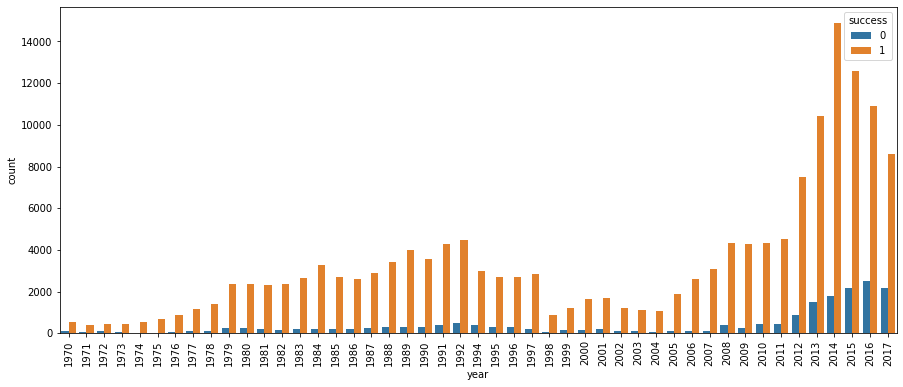

In [187]:
#success of the year 

plt.figure(figsize=[15,6])
sna.countplot('year',data=df,hue='success')
plt.xticks(rotation=90)
plt.show()

In [218]:
#viz of terrorism in Zimbabwe
px.scatter_matrix(zim, title='Terrorism record in Zimbabwe',dimensions=["year", "success", "wound", "kill"],color='state')

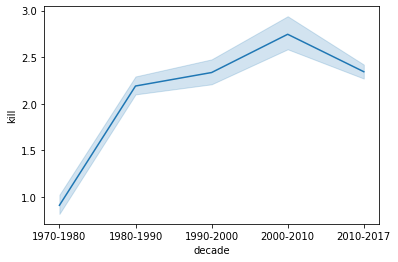

In [217]:
#viz of most attacks happend
sna.lineplot(df['decade'],df['kill'])

Text(0.5, 1.0, 'type of attack happened in huge')

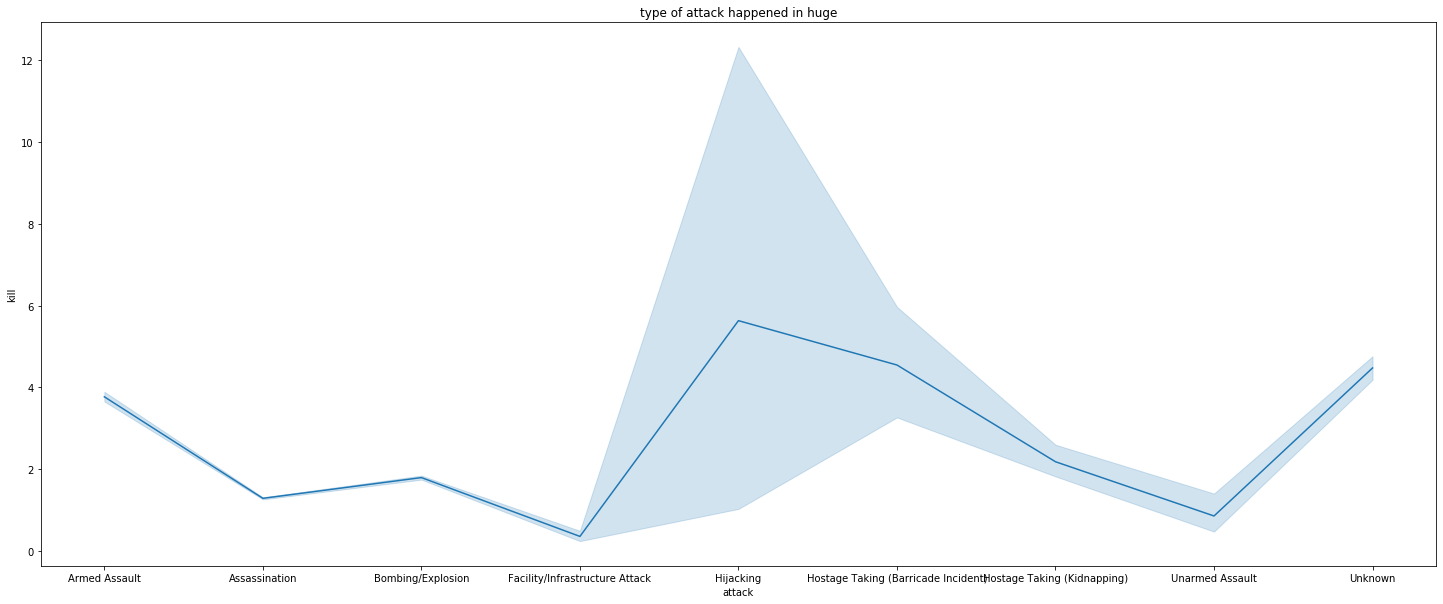

In [253]:
#types of attacks

plt.figure(figsize=[25,10])
sna.lineplot(df['attack'],df['kill'])
plt.title('type of attack happened in huge')

Text(0.5, 1.0, 'Wepons used for attack')

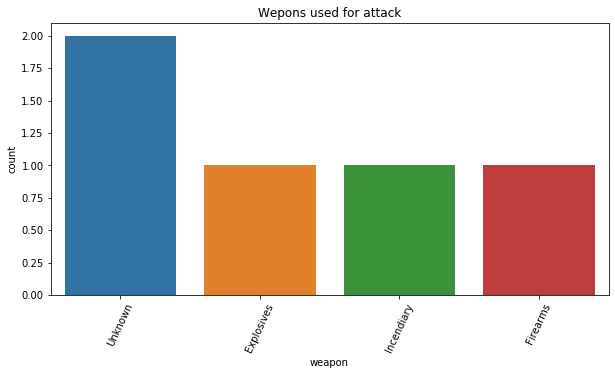

In [254]:
#weapon used for attack

plt.figure(figsize=[10,5])
sna.countplot(df['weapon'][:5])
plt.xticks(rotation=65)
plt.title('Wepons used for attack')

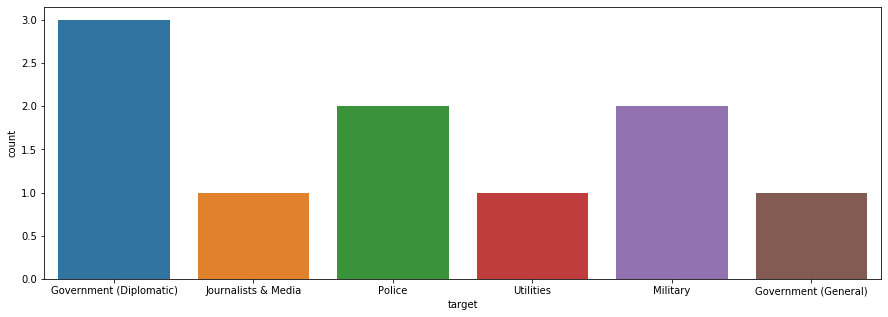

In [258]:
#targeted palces for attack

plt.figure(figsize=[15,5])
sna.countplot(df['target'][:10])